In [1]:
# Importing the necessary libraries
import requests
from bs4 import BeautifulSoup as bs
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Retrieving reviews of the producct from the website 
tp_reviews = []
for i in range(1,21):
    ip = []
    url = 'https://www.amazon.in/TP-Link-Archer-A6-Wireless-Internet/product-reviews/B07W9KYT62/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    response = requests.get(url)
    soup = bs(response.content,'html.parser')
    reviews = soup.find_all('span',attrs='a-size-base review-text review-text-content')
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    
    tp_reviews = tp_reviews + ip

In [3]:
# Reviews in text format

with open('C:/Users/vaibh/Desktop/360 Digitmg/NLP/Assignments/tp_reviews.txt','w',encoding = 'utf8') as output:
    output.write(str(tp_reviews))

In [4]:
# Product reviews in list
tp_reviews[1]

'\nThe thing died on me within a month of use - only the power light turns on, no wifi or network lights. Tried the wifi button as well as the reset hole with no response. Tried turning it off and unplugged for a whole day and still nothing. Checked the forums and found nothing else I could do. Maybe I have a defective unit but I’m not buying TP-Link ever again.On the (relatively) plus side it was easy to set up and the range is good enough for my small flat. Could handle three alexa devices, a firestick, a few laptops and a couple of smart bulbs simultaneously with no issues.A shame indeed as I was quite happy with it until it conked.\n'

In [5]:
# Joining all reviews in paragraph .i.e. converting list to string
ip_rev_string = ' '.join(tp_reviews)

In [6]:
import nltk

# Removing unwanted symbols 
ip_rev_string = re.sub('[^A-Za-z" "]+',' ',ip_rev_string.lower())

In [7]:
# Words from string
ip_reviews_words = ip_rev_string.split(' ')
ip_reviews_words = ip_reviews_words[1:]

In [8]:
# Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(input = ip_reviews_words, use_idf=True, ngram_range=(1, 1))
X = vectorizer.fit_transform(ip_reviews_words)

In [9]:
# Stopwords 
with open(r'C:\Users\vaibh\Desktop\360 Digitmg\NLP\Study/stopwords_en.txt','r') as st:
    stopwords = st.read()
stopwords = stopwords.split('\n')
# Adding new stopwords to the list
stopwords.extend(['tp','link','archer','wifi','band','mu','mimo','router','ghz','mbps','tenda','ac'])

In [10]:
# Removing all stop words
ip_reviews_words = [word for word in ip_reviews_words if word not in stopwords] 

In [11]:
# Joining all words
ip_reviews_words = ' '.join(ip_reviews_words)

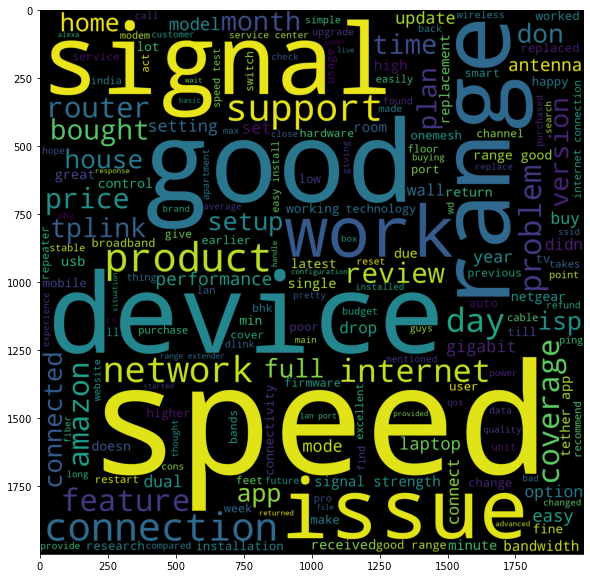

In [12]:
# Genearating wordcloud of the corpus
plt.figure(figsize=(15,10))
wordcloud_ip = WordCloud(background_color='black',width=2000,height=2000).generate(ip_reviews_words)
plt.imshow(wordcloud_ip)

In [13]:
# importing positive and negative words
with open('C:/Users/vaibh/Desktop/360 Digitmg/NLP/Study/positive-words.txt','r') as pos:
    pos_words = pos.read().split('\n')
with open('C:/Users/vaibh/Desktop/360 Digitmg/NLP/Study/negative-words.txt','r') as neg:
    neg_words = neg.read().split('\n')

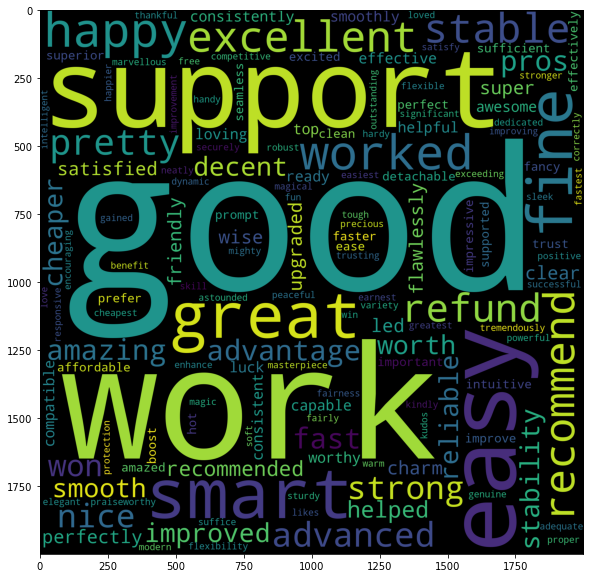

In [14]:
# Generating positive words wordcloud
pos_ip_reviews = " ".join ([word for word in ip_reviews_words.split(' ') if word in pos_words])

plt.figure(figsize=(15,10))
wordcloud_pos_ip = WordCloud(background_color='black',width=2000,height=2000).generate(pos_ip_reviews)
plt.imshow(wordcloud_pos_ip)

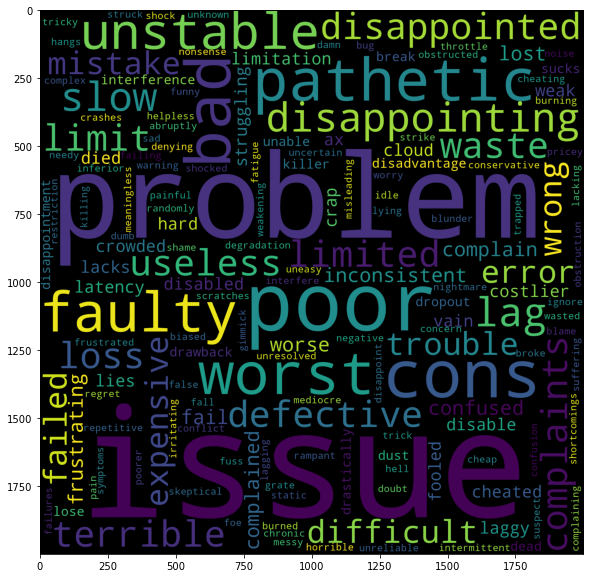

In [15]:
# Generating negative words wordcloud
neg_ip_reviews = ' '.join([word for word in ip_reviews_words.split(' ') if word in neg_words])

plt.figure(figsize=(15,10))
wordcloud_neg_ip = WordCloud(background_color='black',width=2000,height=2000).generate(neg_ip_reviews)
plt.imshow(wordcloud_neg_ip)

In [16]:
# Lemmatize each word
WNL = nltk.WordNetLemmatizer()
text_content = [WNL.lemmatize(word) for word in ip_reviews_words.split(' ')]

In [17]:
# Taking only non-null entries
text_content = [i for i in text_content if len(i) != 0]

In [18]:
# Bigrams
bigram_lists = list(nltk.bigrams(text_content))
bigrams = [' '.join(word) for word in bigram_lists]

In [19]:
# Using countvectorizer to check for frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(2,2))
bag_off_words = vect.fit_transform(bigrams)

In [20]:
# Sorting bigrams according to frequency
sum_words = bag_off_words.sum(axis=0)
words_freq = [(word,sum_words[0,idx]) for word,idx in vect.vocabulary_.items()] 
words_freq = sorted(words_freq, key = lambda x:x[1], reverse = True)
words_freq[0:100]

[('signal strength', 19),
 ('tether app', 17),
 ('range good', 16),
 ('good range', 13),
 ('internet connection', 11),
 ('speed test', 10),
 ('easy install', 10),
 ('internet speed', 9),
 ('service center', 9),
 ('range extender', 8),
 ('speed speed', 8),
 ('lan port', 8),
 ('good speed', 8),
 ('product good', 7),
 ('full speed', 7),
 ('gigabit port', 7),
 ('range speed', 7),
 ('connection speed', 7),
 ('customer care', 7),
 ('sq ft', 7),
 ('signal good', 7),
 ('smart tv', 6),
 ('price range', 6),
 ('firmware update', 6),
 ('work fine', 6),
 ('good connection', 6),
 ('easy setup', 6),
 ('wi fi', 6),
 ('speed drop', 6),
 ('speed good', 6),
 ('cat cable', 5),
 ('speed connection', 5),
 ('doesn work', 5),
 ('speed internet', 5),
 ('build quality', 5),
 ('good signal', 5),
 ('usb port', 5),
 ('ethernet cable', 5),
 ('device connected', 5),
 ('writing review', 4),
 ('power light', 4),
 ('speed device', 4),
 ('speed lan', 4),
 ('max speed', 4),
 ('core processor', 4),
 ('high speed', 4),
 ('

(-0.5, 1999.5, 1999.5, -0.5)

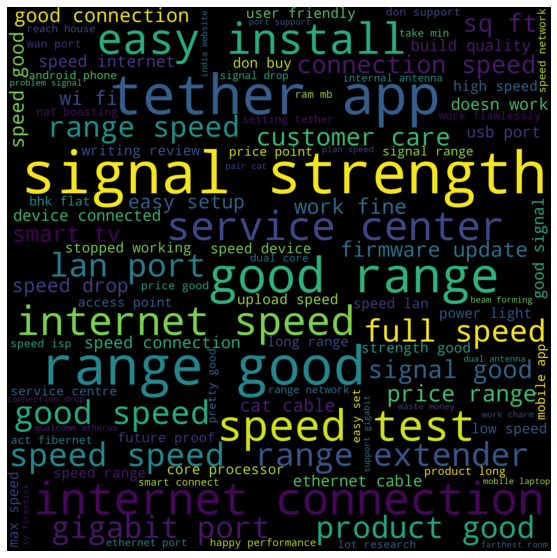

In [21]:
# Bigram Wordcloud 

plt.figure(figsize=(15,10))
wordcloud_bigram = WordCloud(max_words= 100 ,background_color='black',width=2000,height=2000).generate_from_frequencies(dict(words_freq))
plt.imshow(wordcloud_bigram, interpolation= 'bilinear')
plt.axis('off')